## Import Libaries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import cumulative_distribution
%matplotlib notebook

## 3.1 Image Pixel Adjustment (gamma)

<IPython.core.display.Javascript object>


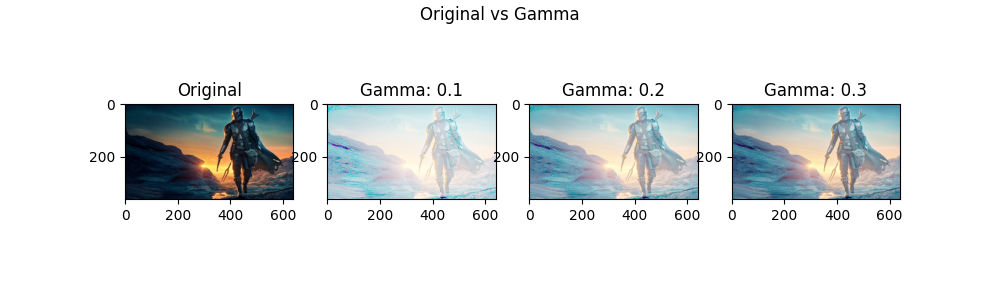

In [2]:
fig = plt.figure(figsize=(10, 3))
fig.suptitle("Original vs Gamma")
rows = 1
columns = 4

def gamma(a, image, gamma, b):
    im_gamma = (a * ((image/255)**gamma) + b) * 255
    im_gamma = im_gamma.astype(np.uint8)
    return im_gamma

#Original
fig.add_subplot(rows, columns, 1)
image = plt.imread('./manda.jpg')
plt.imshow(image)
plt.title('Original')
plt.show()

#Gamma
fig.add_subplot(rows, columns, 2)
gamma1 = gamma(1, image, 0.1, 0)
plt.imshow(gamma1)
plt.title('Gamma: 0.1')
plt.show()

fig.add_subplot(rows, columns, 3)
gamma2 = gamma(1, image, 0.2, 0)
plt.imshow(gamma2)
plt.title('Gamma: 0.2')
plt.show()

fig.add_subplot(rows, columns, 4)
gamma3 = gamma(1, image, 0.3, 0)
plt.imshow(gamma3)
plt.title('Gamma: 0.3')
plt.show()

### Video Writer Object

In [6]:
width = 640
height = 360

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('image_gamma_20fps.mp4',fourcc,10.0,(width,height))

image = cv2.imread('./manda.jpg')

def gamma(a, image, gamma, b):
    im_gamma = (a * ((image/255)**gamma) + b) * 255
    im_gamma = im_gamma.astype(np.uint8)
    return im_gamma

r = 0.01

for i in range(30):
    Image_gamma = gamma(1, image, r, 0)
    out.write(Image_gamma)
    r += 0.01
    
for i in range(30):
    Image_gamma = gamma(1, image, r, 0)
    out.write(Image_gamma)
    r -= 0.01

out.release() 

## 3.2 Image Histogram Equalization

<IPython.core.display.Javascript object>


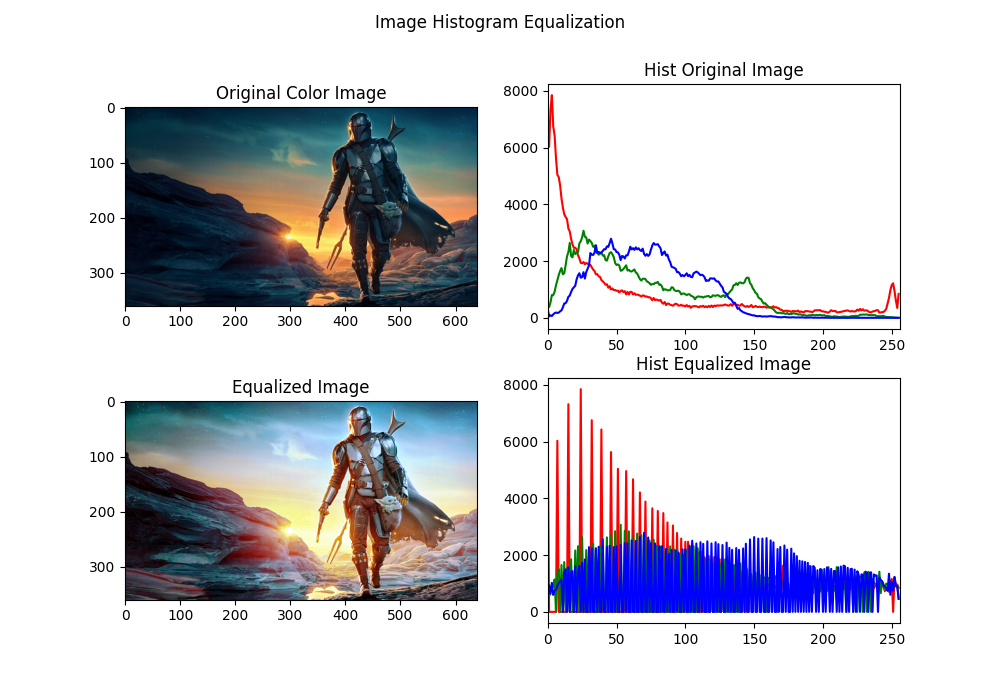

In [48]:
image = plt.imread('./manda.jpg')
R, G, B = cv2.split(image)

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Image Histogram Equalization")
rows = 2
columns = 2

#Original
fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.title('Original Color Image')
plt.show()

fig.add_subplot(rows, columns, 2)

color = ('r', 'g', 'b')
for k,color in enumerate(color):
    histogram = cv2.calcHist([image], [k], None, [256], [0, 256], accumulate=False)
    plt.plot(histogram,color = color)
    plt.xlim([0,256])

plt.title('Hist Original Image')
plt.show()

#Equalized Image

equalized_r = cv2.equalizeHist(R)
equalized_g = cv2.equalizeHist(G)
equalized_b = cv2.equalizeHist(B)

fig.add_subplot(rows, columns, 3)
equalized_image = cv2.merge((equalized_r, equalized_g, equalized_b))
plt.imshow(equalized_image)
plt.title('Equalized Image')
plt.show()

fig.add_subplot(rows, columns, 4)

color = ('r', 'g', 'b')
for k,color in enumerate(color):
    histogram = cv2.calcHist([equalized_image], [k], None, [256], [0, 256], accumulate=False)
    plt.plot(histogram,color = color)
    plt.xlim([0,256])

plt.title('Hist Equalized Image')
plt.show()

## 3.3 Image Histogram Matching

<IPython.core.display.Javascript object>


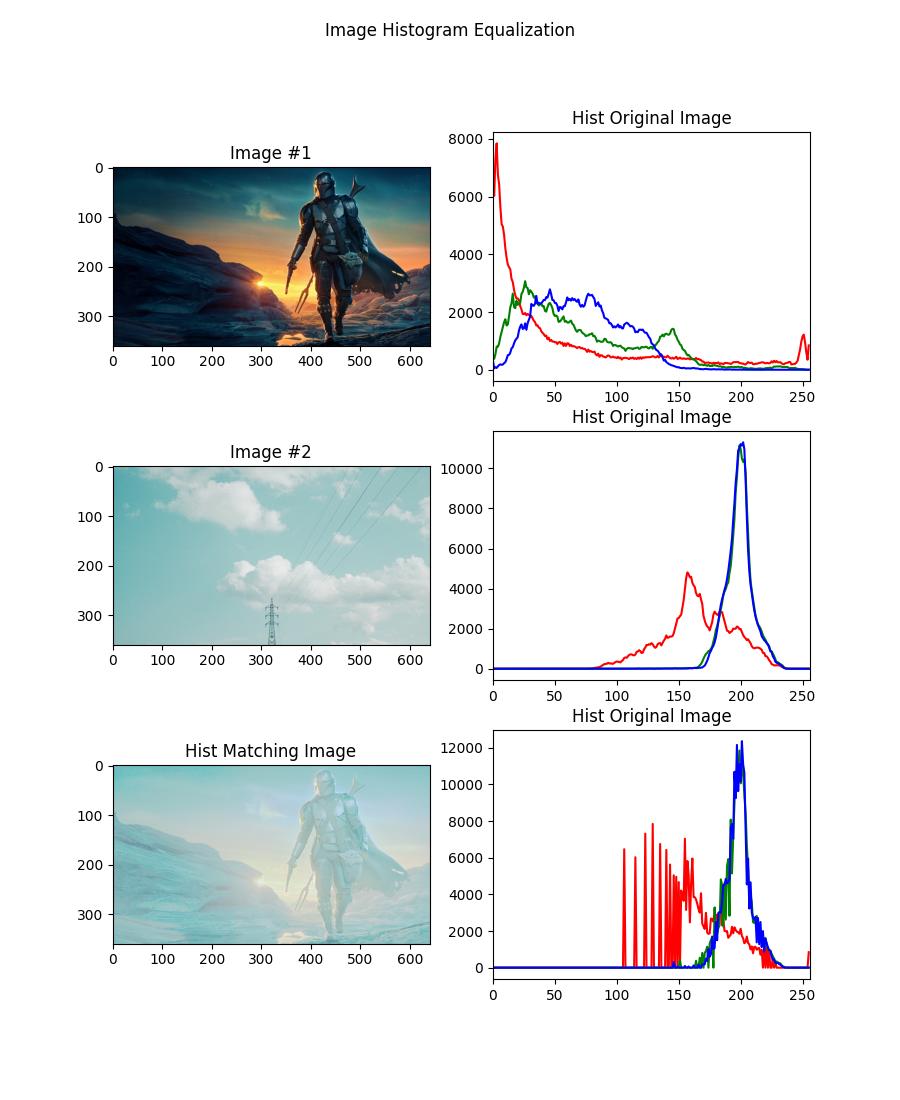

In [60]:
img1 = plt.imread('./manda.jpg')
img2 = plt.imread('./sky.jpg')

fig = plt.figure(figsize=(9, 11))
fig.suptitle("Image Histogram Equalization")
rows = 3
columns = 2

#CDF
def cdf(im):
    c, b = cumulative_distribution(im)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

#Matching
def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))
    pix_repl = {i:b[i] for i in range(256)}
    mp = np.arange(0, 256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

#Image1
fig.add_subplot(rows, columns, 1)
plt.imshow(img1)
plt.title('Image #1')
plt.show()

#Hist Original Image
fig.add_subplot(rows, columns, 2)

color = ('r', 'g', 'b')
for k,color in enumerate(color):
    histogram = cv2.calcHist([img1], [k], None, [256], [0, 256], accumulate=False)
    plt.plot(histogram,color = color)
    plt.xlim([0,256])

plt.title('Hist Original Image')
plt.show()

#Image2
fig.add_subplot(rows, columns, 3)
plt.imshow(img2)
plt.title('Image #2')
plt.show()

#Hist Equalized Image
fig.add_subplot(rows, columns, 4)

color = ('r', 'g', 'b')
for k,color in enumerate(color):
    histogram = cv2.calcHist([img2], [k], None, [256], [0, 256], accumulate=False)
    plt.plot(histogram,color = color)
    plt.xlim([0,256])

plt.title('Hist Original Image')
plt.show()


#Hist Matching Image
fig.add_subplot(rows, columns, 5)
Im_result = np.zeros((360, 640, 3), dtype=np.uint8)

#1.Calculate CDF of each color channel R,G,B
cdf_im1_r = cdf(img1[:, :, 0])
cdf_im1_g = cdf(img1[:, :, 1])
cdf_im1_b = cdf(img1[:, :, 2])
cdf_im2_r = cdf(img2[:, :, 0])
cdf_im2_g = cdf(img2[:, :, 1])
cdf_im2_b = cdf(img2[:, :, 2])

#2. Histogram Matching of each color channel R,G,B
Im_result[:,:,0] = hist_matching(cdf_im1_r, cdf_im2_r, img1[:, :, 0])
Im_result[:,:,1] = hist_matching(cdf_im1_g, cdf_im2_g, img1[:, :, 1])
Im_result[:,:,2] = hist_matching(cdf_im1_b, cdf_im2_b, img1[:, :, 2])

plt.imshow(Im_result)
plt.title('Hist Matching Image')
plt.show()

#Hist Equalized Image
fig.add_subplot(rows, columns, 6)

color = ('r', 'g', 'b')
for k,color in enumerate(color):
    histogram = cv2.calcHist([Im_result], [k], None, [256], [0, 256], accumulate=False)
    plt.plot(histogram,color = color)
    plt.xlim([0,256])

plt.title('Hist Original Image')
plt.show()